In [2]:
import pandas as pd
import matplotlib.pyplot as plt

1. Nationality Composition in Geneva, Switzerland
A breakdown of nationalities in Geneva using a pie chart.

2. Trends in Nationality Changes
Visualizing how nationality distributions have evolved over time by continent.

3. Nationality Distribution by Continent
Analyzing the distribution of nationalities across continents.

In [3]:
df = pd.read_csv('Geneva_Nationality.csv')

#Standardize column names (remove non-breaking spaces and commas)
df.columns = df.columns.str.replace(r'\s+', '', regex=True).str.replace(',', '.')

df.iloc[:, 1:] = df.iloc[:, 1:].astype(str).replace({
    r'\s+': '',
    '-': '',
    ',': '.'
}, regex=True)

# Convert to numeric and errors='coerce' replace invalid values with NaN
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

df.fillna(0, inplace=True) # There is a nan when is suppose to be 0

# Convert column names to integers (except 'Country')
df.columns = ['Country'] + [int(float(col)) for col in df.columns[1:]]

df.isnull().sum()

/tmp/ipykernel_1655/589067564.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0, inplace=True) # There is a nan when is suppose to be 0


Country    0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
2022       0
2023       0
dtype: int64

# Nationality Composition in Geneva, Switzerland

In [4]:
# Define continent subsets
dfeurope = df.iloc[3:52].copy()
dfamerica = df.iloc[53:88].copy()
dfafrica = df.iloc[89:144].copy()
dfasia = df.iloc[145:194].copy()
dfoceania = df.iloc[196:208].copy()

In [5]:
# Exclude specific countries from both datasets
To_drop = ["Asie", "Afrique",'Amérique']

# Sorting the data
df2023 = df[3:].sort_values(by=2023, ascending=False)
df2023 = df2023[~df2023["Country"].isin(To_drop)]

df2013 = df[3:].sort_values(by=2013, ascending=False)
df2013 = df2013[~df2013['Country'].isin(To_drop)]

# Select top 20 for both years
top2023 = df2023[:20]
top2013 = df2013[:20]

# Select bottom 20 where values are greater than 0
bottom2023 = df2023[df2023[2023]>0].iloc[-20:]
bottom2013 = df2013[df2013[2013]>0].iloc[-20:]

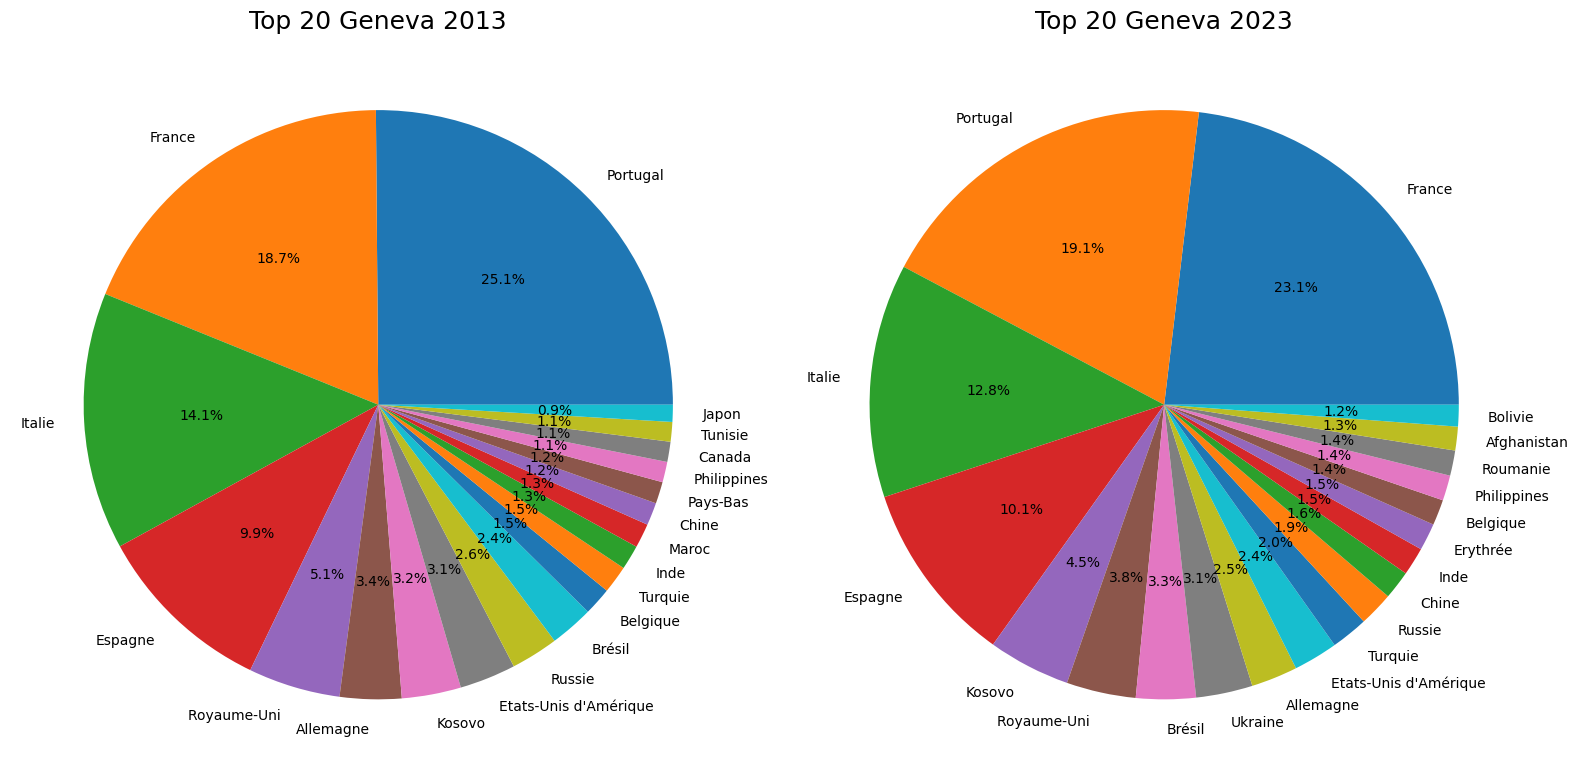

In [6]:
plt.figure(figsize=(16,8))

# Plot for 2013 top
plt.subplot(1,2,1)
plt.pie(top2013[2013], labels=top2013['Country'], autopct='%1.1f%%')
plt.title('Top 20 Geneva 2013', size=18)

# Plot for 2023 top
plt.subplot(1,2,2)
plt.pie(top2023[2023], labels=top2023['Country'], autopct='%1.1f%%')
plt.title('Top 20 Geneva 2023', size=18)

plt.tight_layout()
plt.show()

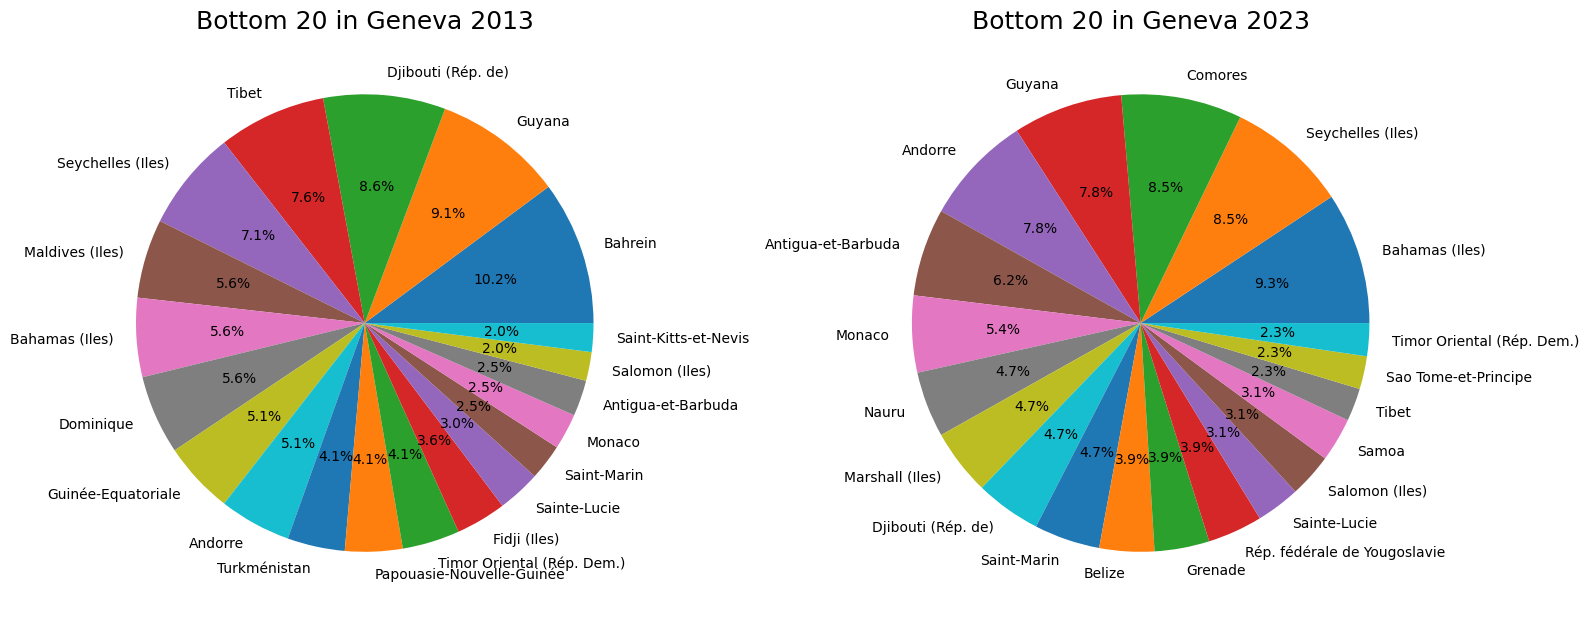

In [7]:
plt.figure(figsize=(16,8))

# Plot for 2013 bottom
plt.subplot(1,2,1)
plt.pie(bottom2013[2013], labels=bottom2013['Country'], autopct='%1.1f%%')
plt.title('Bottom 20 in Geneva 2013', size=18)

# Plot for 2023 bottom
plt.subplot(1,2,2)
plt.pie(bottom2023[2023], labels=bottom2023['Country'], autopct='%1.1f%%')
plt.title('Bottom 20 in Geneva 2023', size=18)

plt.tight_layout()
plt.show()

# Trends in Nationality Changes

In [8]:
dfCeurope = df[df['Country']=='Europe']
dfCamerique = df[df['Country']=='Amérique']
dfCafrique = df[df['Country']=='Afrique']
dfCasie = df[df['Country']=='Asie']
dfCoceanie = df[df['Country']=='Océanie']

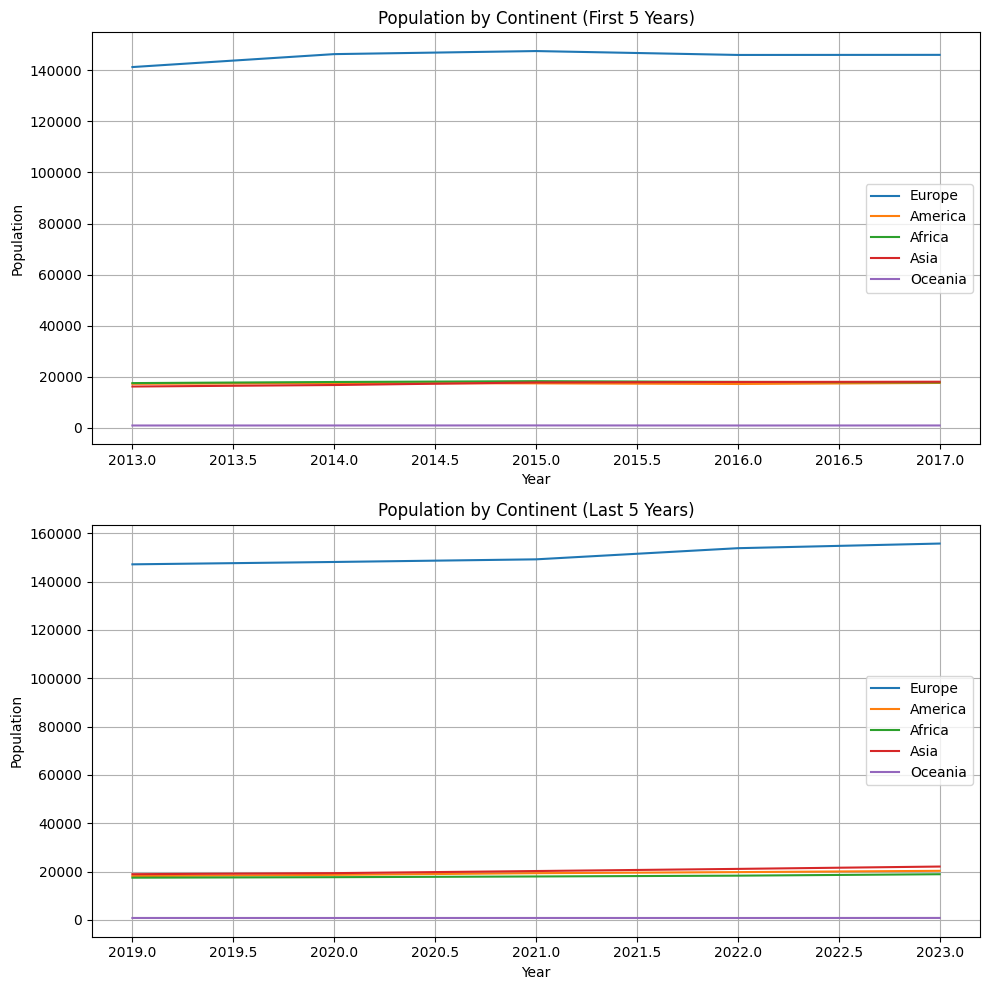

In [9]:
# Define the years by extracting column names, excluding the 'Country' column
years = df.columns[1:].astype(int)

# Split the years into two parts: the first 5 years and the last 5 years
first_5_years = years[:5]
last_5_years = years[-5:]

# Create a figure for the subplots
plt.figure(figsize=(10, 10))

# First subplot: Plotting the first 5 years
plt.subplot(2, 1, 1)
plt.plot(first_5_years, dfCeurope.iloc[0, 1:6], linestyle='-', label='Europe')
plt.plot(first_5_years, dfCamerique.iloc[0, 1:6], linestyle='-', label='America')
plt.plot(first_5_years, dfCafrique.iloc[0, 1:6], linestyle='-', label='Africa')
plt.plot(first_5_years, dfCasie.iloc[0, 1:6], linestyle='-', label='Asia')
plt.plot(first_5_years, dfCoceanie.iloc[0, 1:6], linestyle='-', label='Oceania')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Continent (First 5 Years)')
plt.legend()
plt.grid(True)

# Second subplot: Plotting the last 5 years
plt.subplot(2, 1, 2)
plt.plot(last_5_years, dfCeurope.iloc[0, -5:], linestyle='-', label='Europe')
plt.plot(last_5_years, dfCamerique.iloc[0, -5:], linestyle='-', label='America')
plt.plot(last_5_years, dfCafrique.iloc[0, -5:], linestyle='-', label='Africa')
plt.plot(last_5_years, dfCasie.iloc[0, -5:], linestyle='-', label='Asia')
plt.plot(last_5_years, dfCoceanie.iloc[0, -5:], linestyle='-', label='Oceania')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Continent (Last 5 Years)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Nationality Distribution by Continent

In [10]:
# Sorting and gettin the right data for Europe
dfeurope_sorted = dfeurope.sort_values(by=2023, ascending=False)
europetop = dfeurope_sorted.iloc[:10]
# Bottom 10 entries where the 2023 value is greater than 0
europebottom = dfeurope_sorted[dfeurope_sorted[2023]>0].iloc[-10:]

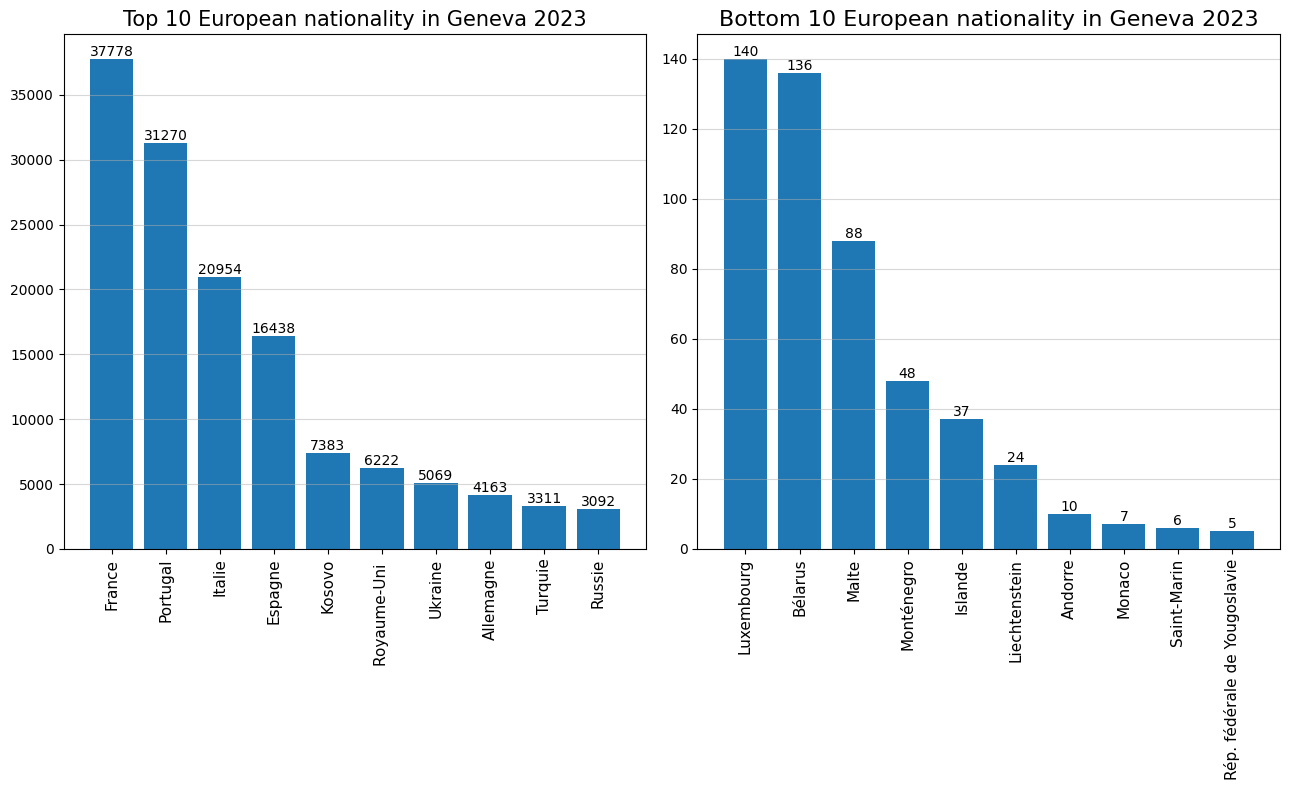

In [11]:
plt.figure(figsize=(13,8))

# Plot for Top 10
plt.subplot(1,2,1)
bars = plt.bar(europetop['Country'], europetop[2023])
plt.title('Top 10 European nationality in Geneva 2023', size=15)
plt.xticks(rotation=90, size=11)
plt.grid(axis='y', alpha=0.5)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}", 
             ha='center', va='bottom') 
    
# Plot for Bottom 10
plt.subplot(1,2,2)
bars = plt.bar(europebottom['Country'], europebottom[2023])
plt.title('Bottom 10 European nationality in Geneva 2023', size=16)
plt.xticks(rotation=90, size=11)
plt.grid(axis='y', alpha=0.5)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, height, f'{int(height)}',
    ha='center',va='bottom')

plt.tight_layout()
plt.show()

In [12]:
# Sorting and gettin the right data for America
america_sorted = dfamerica.sort_values(by=2023, ascending=False)
americatop = america_sorted[:10]
# Bottom 10 entries where the 2023 value is greater than 0
americabottom = america_sorted[america_sorted[2023]>0].iloc[-10:]

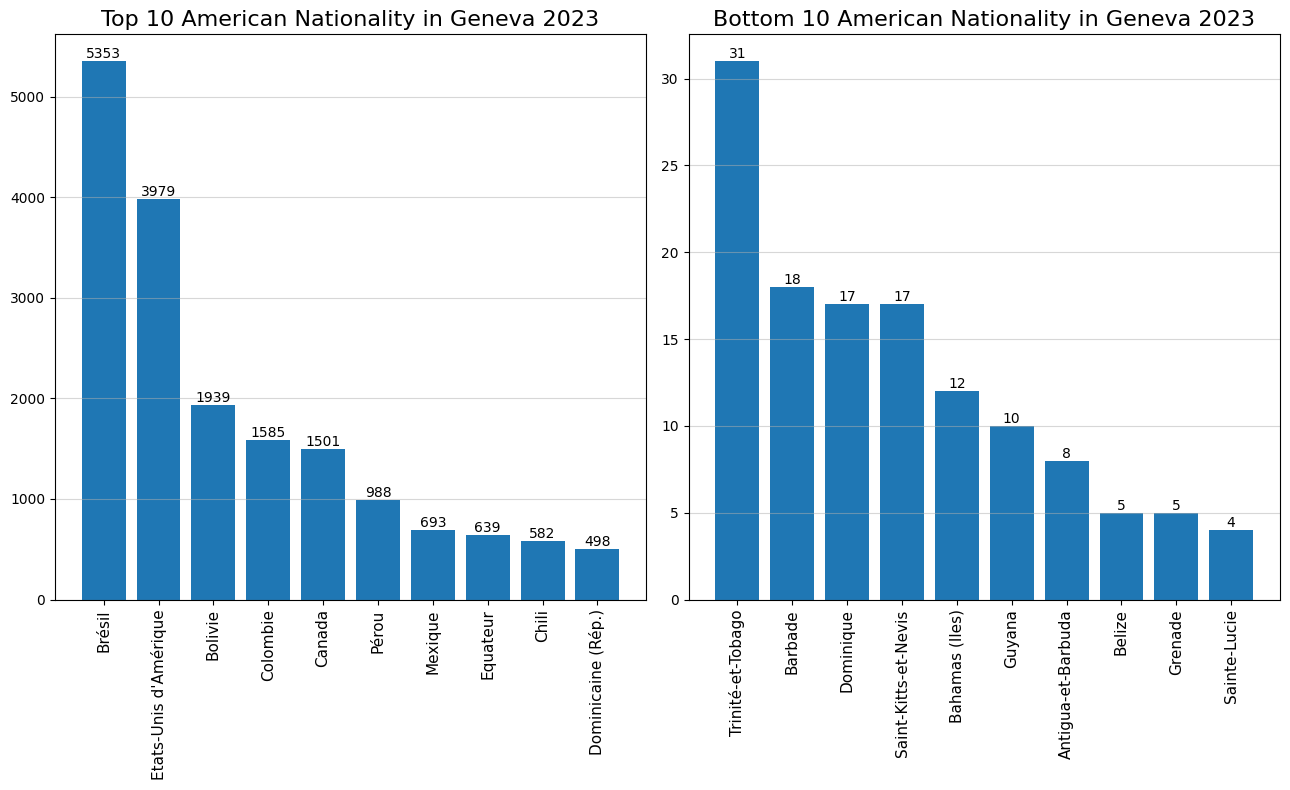

In [13]:
plt.figure(figsize=(13,8))

# Plot the top 10
plt.subplot(1,2,1)
bars = plt.bar(americatop['Country'], americatop[2023])
for bar in bars:
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}",
             ha='center', va='bottom')
plt.title('Top 10 American Nationality in Geneva 2023', size=16)
plt.xticks(rotation=90, size=11)
plt.grid(axis='y', alpha=0.5)

# Plot the bottom 10
plt.subplot(1,2,2)
bars = plt.bar(americabottom['Country'],americabottom[2023])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height,f"{int(height)}",
             ha='center', va='bottom')
plt.title('Bottom 10 American Nationality in Geneva 2023', size=16)
plt.xticks(rotation=90, size=11)
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

In [14]:
# Sorting and gettin the right data for Africa
africa_sorted = dfafrica.sort_values(by=2023, ascending=False)
africatop = africa_sorted[:10]
# Bottom 10 entries where the 2023 value is greater than 0
africabottom = africa_sorted[africa_sorted[2023]>0].iloc[-10:]
# 53 country, Africa have 54 country this show how diverse geneva is.

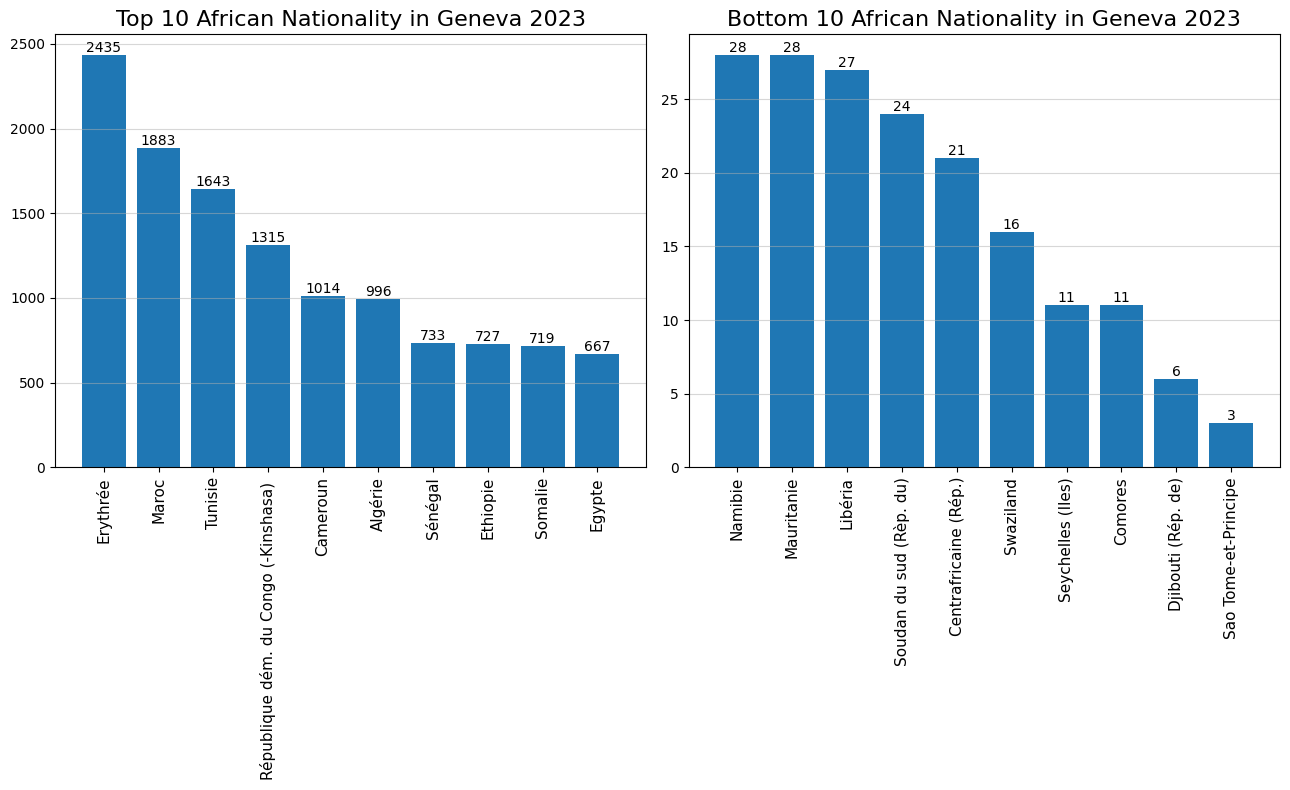

In [15]:
plt.figure(figsize=(13,8))

# Plot the top 10
plt.subplot(1,2,1)
bars = plt.bar(africatop['Country'],africatop[2023])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{int(height)}",
             ha='center', va='bottom')
plt.title('Top 10 African Nationality in Geneva 2023', size=16)
plt.grid(axis='y', alpha=0.5)
plt.xticks(rotation=90, size=11)

# Plot the bottom 10
plt.subplot(1,2,2)
bars = plt.bar(africabottom['Country'],africabottom[2023])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, height,f'{int(height)}',
             ha='center', va='bottom')
plt.title('Bottom 10 African Nationality in Geneva 2023', size=16)
plt.xticks(rotation=90, size=11)
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

In [16]:
# Sorting and gettin the right data for Asia
asia_sorted = dfasia.sort_values(by=2023, ascending=False)
topasia= asia_sorted[:10]
# Bottom 10 entries where the 2023 value is greater than 0
bottomasia = asia_sorted[asia_sorted[2023]>0].iloc[-10:]

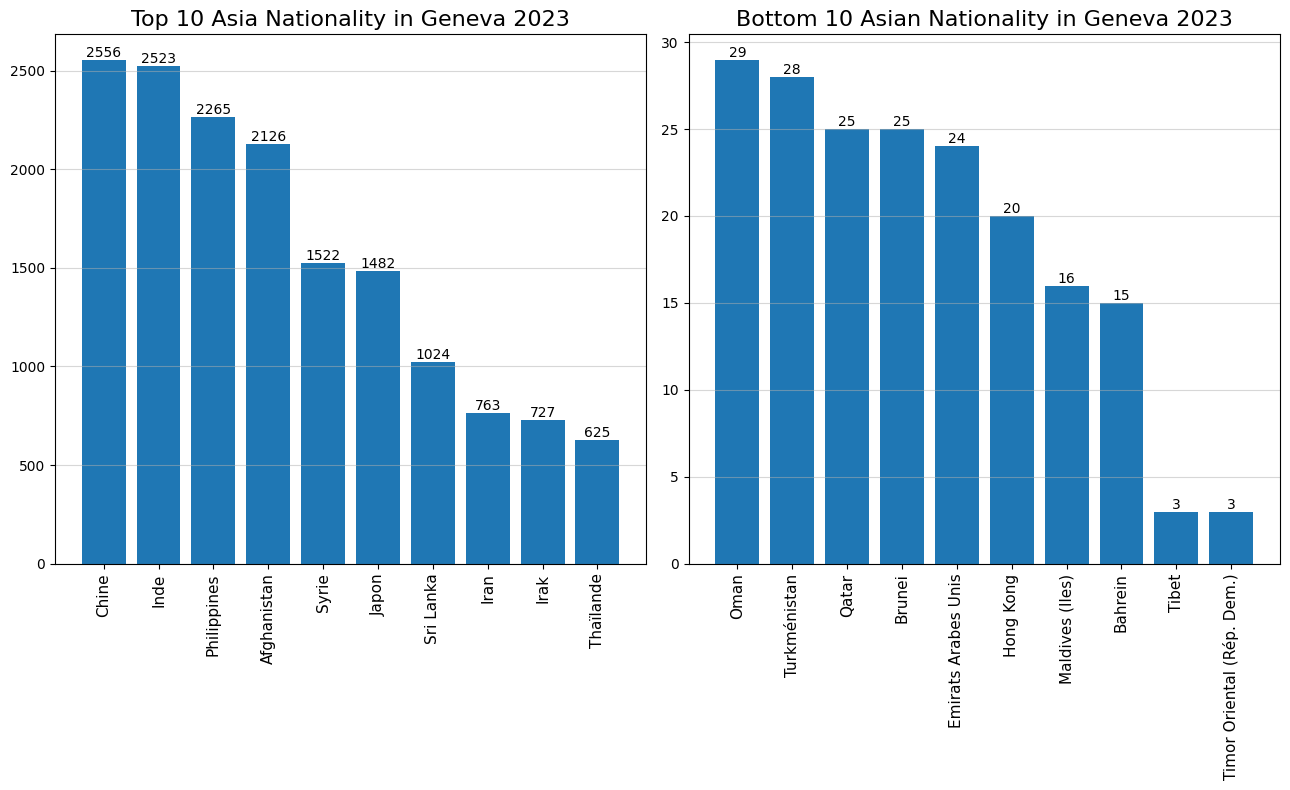

In [17]:
plt.figure(figsize=(13,8))

# Plot the top 10
plt.subplot(1,2,1)
bars = plt.bar(topasia['Country'], topasia[2023])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height,f'{int(height)}',
             ha='center', va='bottom')
plt.xticks(rotation=90, size=11) 
plt.title('Top 10 Asia Nationality in Geneva 2023', size=16)
plt.grid(axis='y', alpha=0.5)

# Plot the bottom 10
plt.subplot(1,2,2)
bars = plt.bar(bottomasia['Country'], bottomasia[2023])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height,f'{int(height)}',
             ha='center', va='bottom')
plt.title('Bottom 10 Asian Nationality in Geneva 2023', size=16)
plt.xticks(rotation=90, size=11)
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

In [18]:
# Here we only have 7 Country for 2023 so we dont need a top or bottom
oceania_sorted = dfoceania.sort_values(by=2023, ascending=False)
oceania_sorted = oceania_sorted[oceania_sorted[2023]>0]

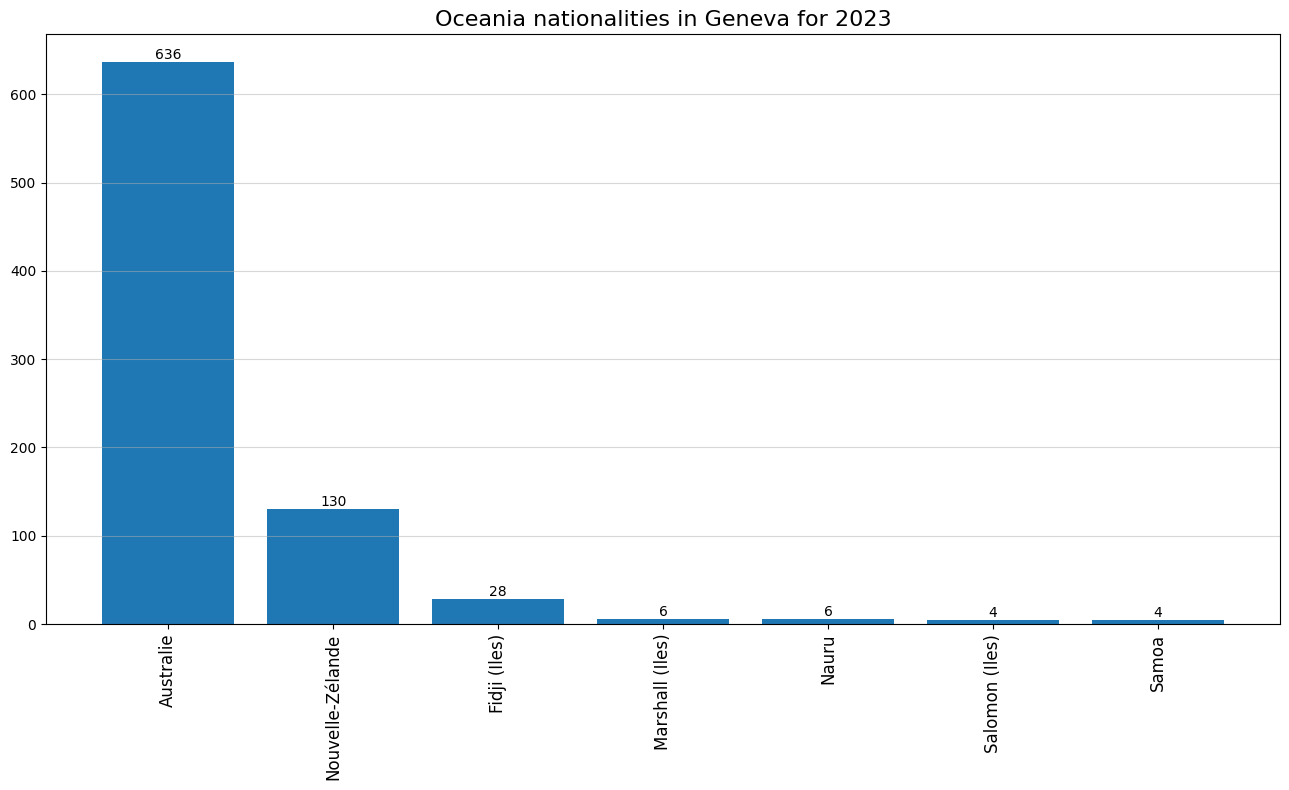

In [19]:
plt.figure(figsize=(13,8))

# Plotting the data
bars = plt.bar(oceania_sorted['Country'], oceania_sorted[2023])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height,f'{int(height)}',
             ha='center', va='bottom')
plt.xticks(rotation=90, size=12)
plt.title('Oceania nationalities in Geneva for 2023', size=16)
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()